# IDEA 
**So the idea of this program is that it recognizes trigger words said by a particular person, in this case me. And this could be integrated in a security system**

**we convert a recording to a wav img and then pass it to a cnn to classify it**

In [0]:
#to get the latest update of fast ai 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
#since this was done on colab, I imported my dataset from drive
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#importing libs 
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *

In [0]:
#I have a very small dataset, 30 training imgs in total, so there was no use in making it into batches 
bs = 30

In [0]:
#create a data object
path = '/content/drive/My Drive/Data (1)' 
tfms = get_transforms(do_flip = False) 
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, size = 224, bs = 15).normalize(imagenet_stats)

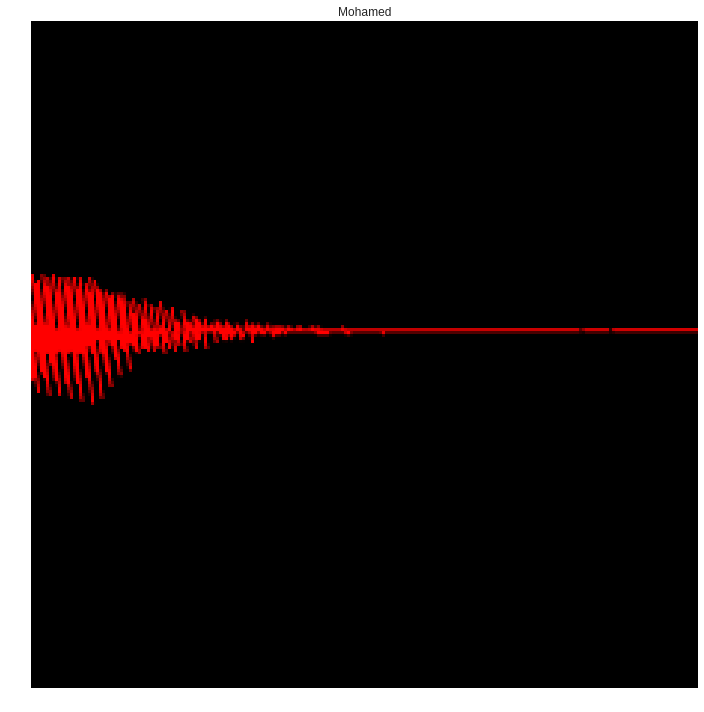

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
data.classes

['Mohamed', 'Other']

In [0]:
#create a learner...
learn = create_cnn(data, models.resnet50, metrics = error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


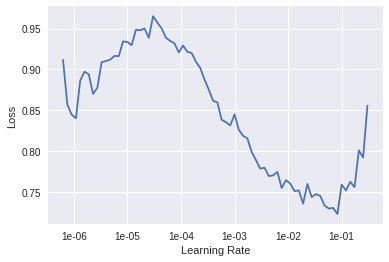

In [0]:
#finding optimal learning rates
learn.lr_find() 
learn.recorder.plot()

In [0]:
# fit for 50 epochs 
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,error_rate
1,1.160047,0.608954,0.300000
2,0.912849,0.573746,0.300000
3,0.829955,0.552094,0.300000
4,0.797869,0.593178,0.300000
5,0.750085,0.531926,0.200000
6,0.699417,0.374665,0.200000
7,0.703981,0.197512,0.100000
8,0.668003,0.098141,0.000000
9,0.606437,0.093941,0.000000
10,0.556867,0.062975,0.000000


In [0]:
#save model...
learn.save('mod1')

In [0]:
#retrain the whole network again not just the classifier 
# but we use a smaller learning rate at earlier layers to not mess them up 
learn.unfreeze() 
learn.fit_one_cycle(30, max_lr = slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.444741,0.173712,0.100000
2,0.317997,0.063198,0.000000
3,0.290664,0.018954,0.000000
4,0.302934,0.012659,0.000000
5,0.347223,0.017276,0.000000
6,0.350271,0.022807,0.000000
7,0.404321,0.015714,0.000000
8,0.399727,0.097699,0.100000
9,0.368202,0.644835,0.200000
10,0.386600,0.894560,0.200000


In [0]:
#since it had done better we save this model instead 
learn.save('mod2')

In [0]:
#Upload individual test images...
from google.colab import files
files.upload()

Saving test18.png to test18.png


{'test18.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07\x08\x00\x00\x01\x18\x08\x06\x00\x00\x00H\x95\xa2\'\x00\x00\x17WIDATx\x9c\xed\xdd\xdb\x96\xa4(\x16\x00\xd0\x98Y\xfd\xff\xbf\\\xf3\x90\x93\xab\xa3mQ\xaez\x80\xbd_\xaa2C\x11\x10Q8\x18\xf9\xf9\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [0]:
#export the model for production... 
learn.export()

In [0]:
p = '/content/test18.png' 

In [0]:
#move to the cpu and pass the img to the model... 
defaults.device = torch.device('cpu')
img = open_image(p) 
learn = load_learner(path)

In [0]:
#finally predict the class 
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Mohamed